In [28]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
!pip install tabulate
from tabulate import tabulate

/Users/nk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


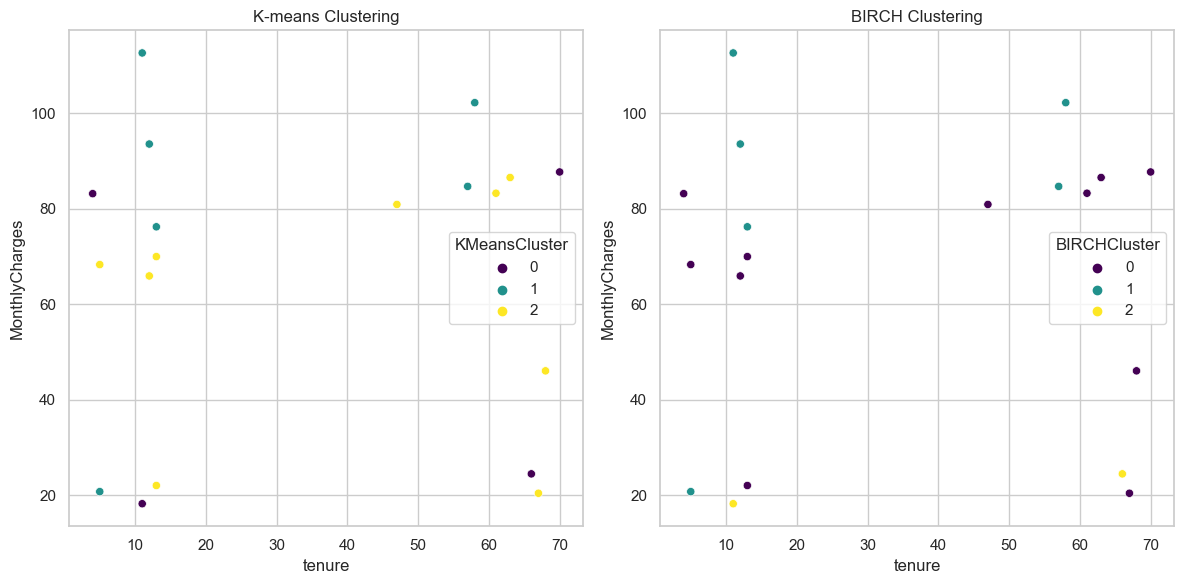

In [42]:
import pandas as pd
from sklearn.cluster import KMeans, Birch
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/Users/nk/Desktop/Customer Attrition/testdata1.csv')

# Assuming you have already preprocessed the data, select the relevant features for clustering
X = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
target_var = data['Churn']

# Define the number of clusters (K for K-means)
n_clusters = 3

# Create K-means and BIRCH models
kmeans = KMeans(n_clusters=n_clusters)
birch = Birch(n_clusters=n_clusters)

# Fit the models to the data
kmeans.fit(X)
birch.fit(X)

# Add cluster labels to the original dataset
data['KMeansCluster'] = kmeans.labels_
data['BIRCHCluster'] = birch.labels_

# Visualize the results
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# K-means cluster plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='KMeansCluster', palette='viridis')
plt.title('K-means Clustering')

# BIRCH cluster plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='BIRCHCluster', palette='viridis')
plt.title('BIRCH Clustering')

plt.tight_layout()
plt.show()


In [43]:
import numpy as np

# Assuming X contains your numeric data
X = X.astype(float)  # Ensure all data is in a numeric format

# Calculate BIRCH inertia manually
birch_inertia = 0.0
for cluster_id in range(n_clusters):
    cluster_points = X[birch.labels_ == cluster_id]
    cluster_center = birch.subcluster_centers_[cluster_id]
    cluster_inertia = np.sum(np.square(np.linalg.norm(cluster_points - cluster_center, axis=1)))
    birch_inertia += cluster_inertia

print("BIRCH Inertia:", birch_inertia)


BIRCH Inertia: 200221804.93610004


In [44]:
kmeans_inertia = kmeans.inertia_

import numpy as np

# Assuming X contains your numeric data
X = X.astype(float)  # Ensure all data is in a numeric format

# Calculate BIRCH inertia manually
birch_inertia = 0.0
for cluster_id in range(n_clusters):
    cluster_points = X[birch.labels_ == cluster_id]
    cluster_center = birch.subcluster_centers_[cluster_id]
    cluster_inertia = np.sum(np.square(np.linalg.norm(cluster_points - cluster_center, axis=1)))
    birch_inertia += cluster_inertia

print("BIRCH Inertia:", birch_inertia)


from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X, kmeans.labels_)
from sklearn.metrics import silhouette_samples

# Calculate the silhouette score for BIRCH
birch_silhouette = silhouette_score(X, birch.labels_)



from sklearn.metrics import davies_bouldin_score

kmeans_db_index = davies_bouldin_score(X, kmeans.labels_)
birch_db_index = davies_bouldin_score(X, birch.labels_)

from sklearn.metrics import calinski_harabasz_score

kmeans_calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
birch_calinski_harabasz = calinski_harabasz_score(X, birch.labels_)


import pandas as pd

data = {
    'Metric': ['Inertia', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'],
    'K-means': [kmeans_inertia, kmeans_silhouette, kmeans_db_index, kmeans_calinski_harabasz],
    'BIRCH': [birch_inertia, birch_silhouette, birch_db_index, birch_calinski_harabasz]
}

comparison_df = pd.DataFrame(data)
print(comparison_df)


BIRCH Inertia: 200221804.93610004
                    Metric       K-means         BIRCH
0                  Inertia  1.022596e+07  2.002218e+08
1         Silhouette Score  5.394471e-01  5.569098e-01
2     Davies-Bouldin Index  5.665556e-01  4.509853e-01
3  Calinski-Harabasz Index  8.187020e+01  7.394565e+01


In [50]:
import pandas as pd
from sklearn.cluster import KMeans, Birch
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def select_best_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    birch = Birch(n_clusters=n_clusters)

    kmeans.fit(X)
    birch.fit(X)

    kmeans_silhouette = silhouette_score(X, kmeans.labels_)
    birch_silhouette = silhouette_score(X, birch.labels_)

    if kmeans_silhouette > birch_silhouette:
        return 'KMeans', kmeans.labels_
    else:
        return 'BIRCH', birch.labels_
    




In [51]:
best_clustering_technique, cluster_labels = select_best_clustering(X, n_clusters)

/Users/nk/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
data['ClusterLabels'] = cluster_labels


In [53]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['ClusterLabels'], target_var, test_size=0.2, random_state=42)

# Create and train a logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.values.reshape(-1, 1), y_train)  # Reshape X_train to make it 2D

# Evaluate the model
accuracy = logistic_regression.score(X_test.values.reshape(-1, 1), y_test)  # Reshape X_test as well
print(f"Logistic Regression Accuracy: {accuracy:.2f}")



AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['ClusterLabels'], data['Churn'], test_size=0.2, random_state=42)

# Create and train a logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train.values.reshape(-1, 1), y_train)  # Reshape X_train to make it 2D

# Evaluate the model
accuracy = logistic_regression.score(X_test.values.reshape(-1, 1), y_test)  # Reshape X_test as well
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


KeyError: 'ClusterLabels'

In [40]:
import pandas as pd

data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,KMeansCluster,BIRCHCluster
0,5223-UZAVK,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,83.26,1800.05,No,0,0
1,4431-EDMIQ,Female,0,Yes,Yes,13,No,No phone service,DSL,No,...,No,Yes,One year,No,Mailed check,22.06,1545.40,No,0,0
2,8582-KRHPJ,Female,0,No,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.78,7875.00,No,1,1
3,2988-PLAHS,Male,0,Yes,No,11,Yes,Yes,Fiber optic,No,...,Yes,No,Two year,No,Electronic check,112.63,5918.80,No,1,1
4,8775-LHDJH,Female,0,Yes,No,57,Yes,No,DSL,Yes,...,No,No,Two year,No,Credit card (automatic),84.69,6614.90,No,1,1
5,6745-JEFZB,Female,0,Yes,Yes,66,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Credit card (automatic),24.50,3410.00,No,2,2
6,1550-EENBN,Male,0,Yes,Yes,63,Yes,No,Fiber optic,Yes,...,No,No,Month-to-month,No,Electronic check,86.55,451.10,No,0,0
7,7860-UXCRM,Male,0,Yes,Yes,12,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,No,Bank transfer (automatic),65.94,521.80,No,0,0
8,6474-FVJLC,Female,0,No,Yes,13,Yes,No,Fiber optic,Yes,...,Yes,Yes,One year,No,Credit card (automatic),76.23,6441.85,No,1,1
9,5951-AOFIH,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,No,Yes,Two year,No,Electronic check,87.71,2660.20,No,2,0
